<a href="https://colab.research.google.com/github/tz2004a/sklearnWork/blob/Google-Colab-Notebooks/Image_Classification_Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam

In [ ]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("The shape of X_train is: {} and y_train is: {}".format(X_train.shape, y_train.shape))
print("The shape of X_test is: {} and y_test is: {}".format(X_test.shape, y_test.shape))

The shape of X_train is: (60000, 28, 28, 1) and y_train is: (60000, 10, 10, 10)
The shape of X_test is: (10000, 28, 28, 1) and y_test is: (10000, 10, 10, 10)


IndexError: ignored

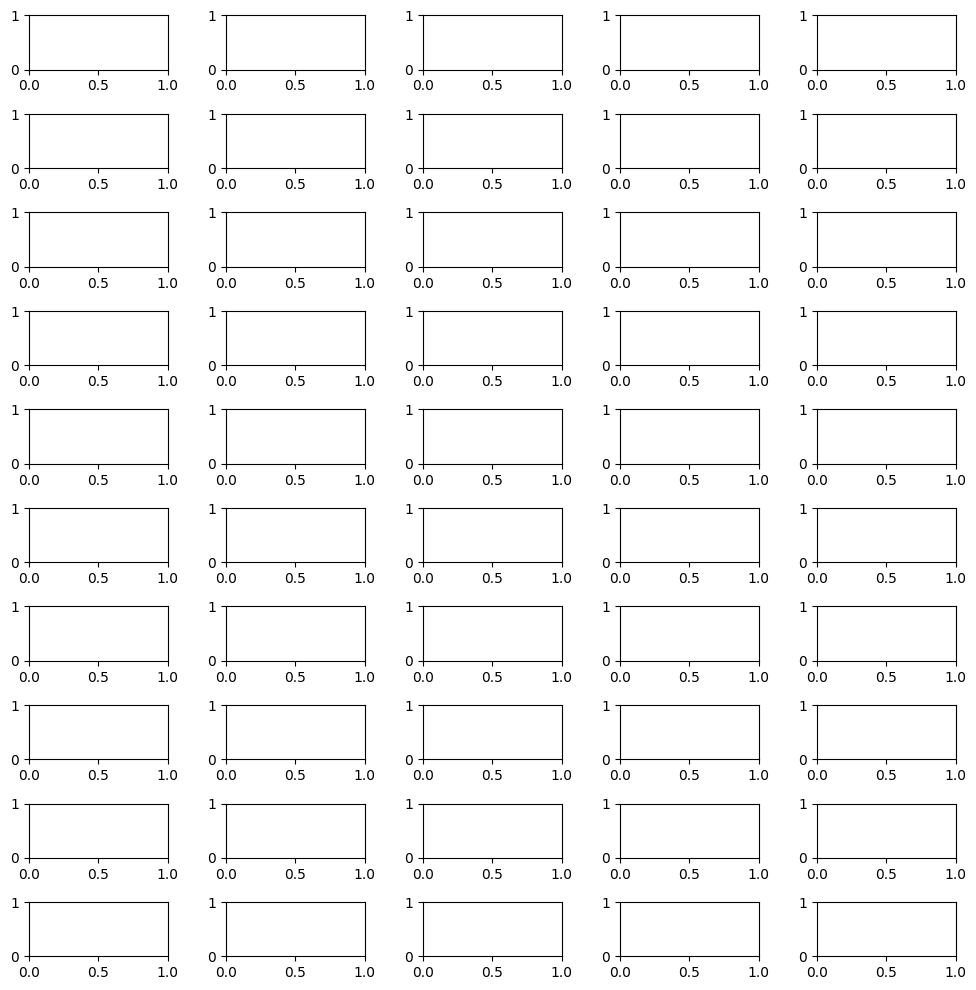

In [ ]:
X_class_num = []
n_rows = 10
n_cols = 5

fig,ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,10))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_rows):
    x_select = X_train[y_train==j]
    ax[j][i].imshow(x_select[random.randint(0,len(x_select-1)),:,:], cmap="gray")
    ax[j][i].axis("off")

    if i == 2:
      ax[j][i].set_title(str(j))
      X_class_num.append(len(x_select))

In [ ]:
inp_shape = 28
batch_size = 32
n_class = 10

input_shape = (inp_shape,inp_shape,1)

X_train = X_train/255.
X_train = X_train.astype(np.float)

X_test = X_test/255.
X_test = X_test.astype(np.float)

<ipython-input-26-9dc9eaad0140>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
<ipython-input-26-9dc9eaad0140>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)


In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],inp_shape,inp_shape,1)
X_test = X_test.reshape(X_test.shape[0],inp_shape,inp_shape,1)

In [ ]:
y_train.shape

(60000, 10, 10, 10)

In [ ]:
y_train = to_categorical(y_train,n_class)
y_test = to_categorical(y_test,n_class)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=20, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=50, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=100, kernel_size=(3,3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024,activation="relu"))
model.add(Dense(units = 128,activation="relu"))

model.add(Dense(units = n_class,activation="softmax"))

In [ ]:
model.compile(Adam(lr=0.01), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 20)        1820      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 50)          9050      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 50)        

In [ ]:
h = model.fit(X_train,y_train, validation_split=0.2, epochs=10, verbose=1, batch_size=batch_size, shuffle=True)

Epoch 1/10


ValueError: ignored